## Catch up from last:
- Remove double entries in peergrade (students appear twice)
- Discuss problems from last:
  - Peergrade
    - quality of feedback, 
    - ease of use
  - mybinder hand-in
    - copy the final url: https://hub.mybinder.org/user/...

## Content
1. Plotting line graphs
- Label Type and Graph Thickness
- x and y axis layout
- plt.scatter() and discrete data points (not calculated, whole numbers)
- plt.savefig() for saving to file
- bar plots using demographic data
- scale on axis
- 3D plotting by stacking 2D plots gradually more transparent
- save to svg file and make pie charts with pygal
- plotting to maps - using Folium
- embedded interactive charts with bokeh

In [1]:
# the following line is jupyter notebook specific 
%matplotlib inline
%matplotlib notebook

http://matplotlib.org/gallery.html#

## Plotting Line Graphs

- When plotting a graph we need points consisting of x,y values
- This gives os 2 data collections: 1 for the x-axis and 1 for the y-axis
  - e.g.: x= [1,2,3,4,5...] and y= [1,4,9,16,25...]
  
![](images/plotingx_y.png)
  

Let’s plot a simple line graph using `matplotlib`, and then customize it to create a more informative visualization of our data.

Just provide matplotlibs `pyplot module` with the numbers as shown below, and `matplotlib` should do the rest.


<IPython.core.display.Javascript object>


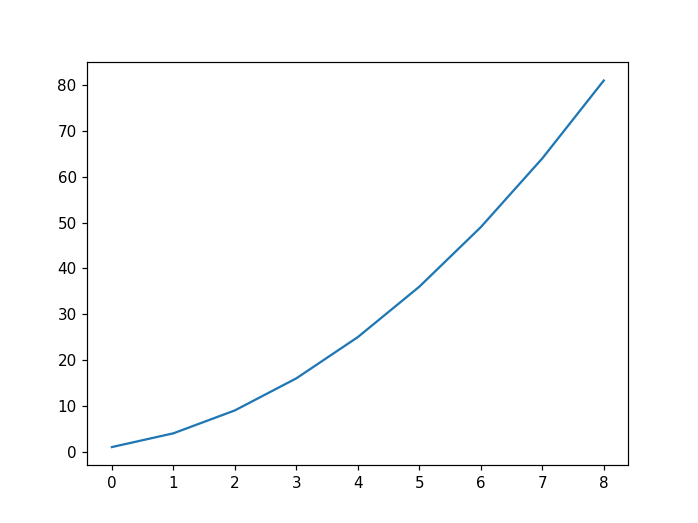

In [37]:
%matplotlib notebook
# %matplotlib notebook necessary to show the plot in ipython notebook (or use plt.show())
import matplotlib.pyplot as plt


squares = [x ** 2 for x in range(1,10)]  # [1, 4, 9, 16, 25]
plt.plot(squares)

# in a program you would have to call plt.show()

We first import the `pyplot` module using the alias `plt` so we do not have to type `pyplot` repeatedly. `pyplot` contains a number of functions that help generate charts and plots.

**OBS:** The first line `%matplotlib inline` is needed when using Jupyter Notebooks. In case you write stand-alone programs or you are coding in an interactive environment on the CLI, then you do not type this line! Instead, you would call the `plt.show()` method when you want to show your plot. To have a new plot figure for each notebook code block we must use `plt.figure()`. In the following is an example of a stand-alone program `plot_example.py`, generating the exact same plot.
    
```python
import matplotlib.pyplot as plt

squares = [x ** 2 for x in range(1,6)]  # [1, 4, 9, 16, 25]
plt.plot(squares)
plt.show()
```


## Changing the Label Type and Graph Thickness

Although the plot shown above illustrates that the numbers are increasing, the label type is too small and the line is too thin. Fortunately, `matplotlib` allows you to adjust every feature of a visualization.

The `linewidth` parameter of the `plot` method controls the thickness of the plotted line. The `title()` method sets a title for the chart. The fontsize parameters, which appear repeatedly throughout the code, control the size of the text on the chart.
The `xlabel()` and `ylabel()` functions allow you to set a title for each of the axes, and the function `tick_params()` styles the tick marks. The arguments shown here affect the tick marks on both the x- and y-axes (`axes='both'`) and set the font size of the tick mark labels to 14 (`labelsize=14`).

[1, 4, 9, 16, 25]


<IPython.core.display.Javascript object>


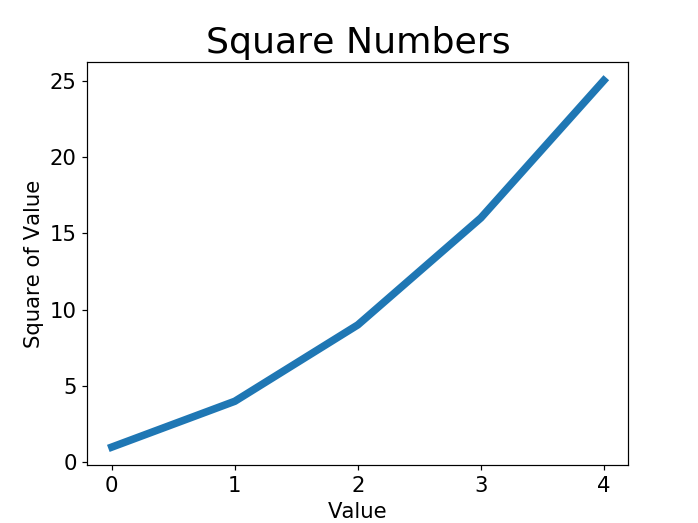

In [38]:
import matplotlib.pyplot as plt

squares = [x ** 2 for x in range(1,6)]
print(squares)
plt.figure()
plt.plot(squares, linewidth=5)
# Set chart title and label axes. 
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)
# Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)

## Correcting the Plot: provide x and y axis values

Now, that we can read the chart better, we see that the data is not plotted correctly. Notice at the end of the graph that the square of 4.0 is shown as 25! Let’s fix that.

When you give plot() a sequence of numbers, it assumes the first data point corresponds to an x-coordinate value of `0`, but our first point corresponds to an x-value of 1. We can override the default behavior by giving plot() both the input and output values used to calculate the squares!

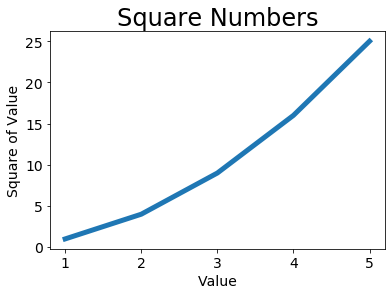

In [4]:
import matplotlib.pyplot as plt

plt.figure()
input_values = range(1,6)
squares = [x ** 2 for x in input_values]

plt.plot(input_values, squares, linewidth=5)

# Set chart title and label axes. 
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)
# Set size of tick labels.

plt.tick_params(axis='both', labelsize=14)

<IPython.core.display.Javascript object>


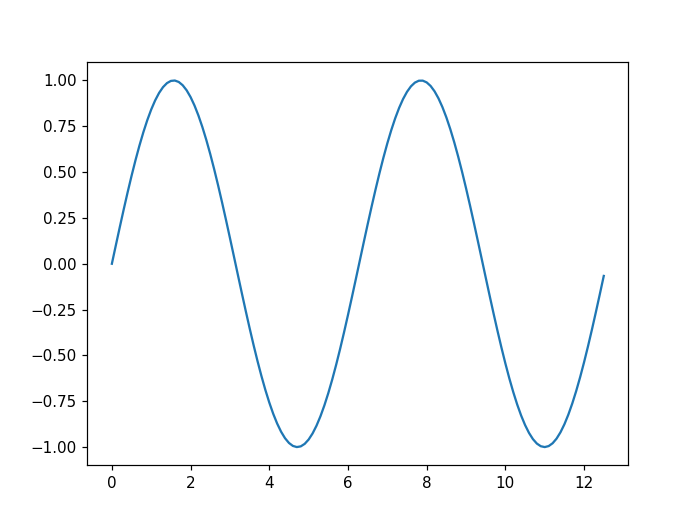

In [40]:
import numpy as np
plt.figure()
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
plt.plot(x,y)


## scatter(): plotting and styling discrete Points

Discrete and Continuous Data.

A line plot is not necessarily the right visualization for discrete data point. Instead a plot of 'points', a scatter plot is more appropriate.

To plot a single point, use the `scatter()` function. Pass the single (x, y) values of the point of interest to `scatter()`.

<IPython.core.display.Javascript object>


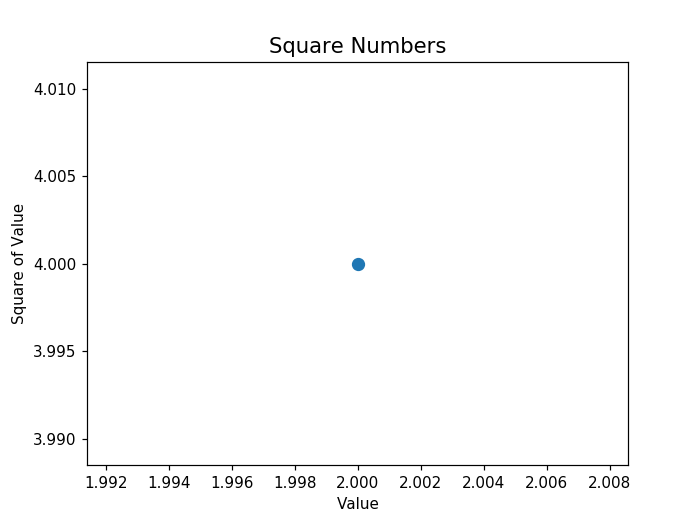

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(2, 4, s=60) # s is the scalar value determines the area of the point.
# Set chart title and label axes.
plt.title("Square Numbers", fontsize=14)
plt.xlabel("Value", fontsize=10)
plt.ylabel("Square of Value", fontsize=10)
# Set size of tick labels.
plt.tick_params(axis='both', which='major', labelsize=10)

To plot a series of points, we can pass `scatter()` separate lists of x- and y-values. The `x_values` list contains the numbers to be squared, and `y_values` contains the square of each number. When these lists are passed to `scatter()`, matplotlib reads one value from each list as it plots each point. The points to be plotted are `(1, 1)`, `(2, 4)`, `(3, 9)`, `(4, 16)`, and `(5, 25)`.

<IPython.core.display.Javascript object>


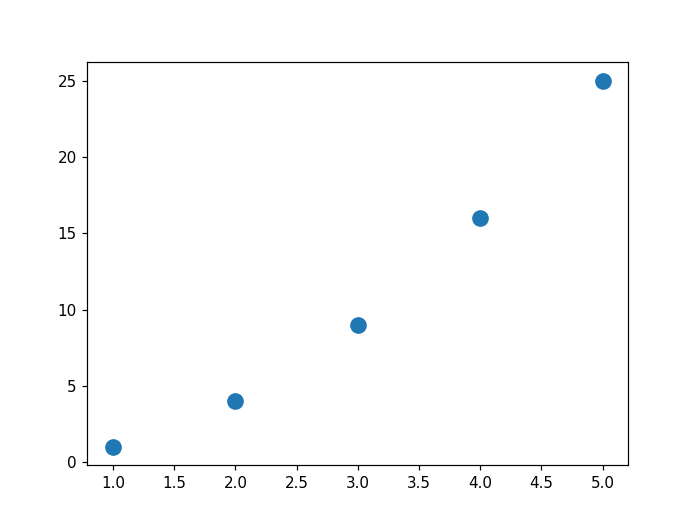

Points to be plotted [(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]


In [42]:
import matplotlib.pyplot as plt
plt.figure()
x_values = range(1, 6)
y_values = [x ** 2 for x in x_values]

print('Points to be plotted {}'.format(list(zip(x_values, y_values)))) # The purpose of zip() is to map the similar index of multiple containers so that they can be used just using as single entity. 

plt.scatter(x_values, y_values, s=100)

### Class exercise
with the following dataset:  

`student_attendance = {'day1':33, 'day2':34,'day3':29,'day4':31,'day5':28,'day6':26,'day7':30}`

1. create a line graph showing attendance over time.
**hint:** use keys() and values() method of the dictionary.  
2. add title and labels for x and y axis.



<IPython.core.display.Javascript object>


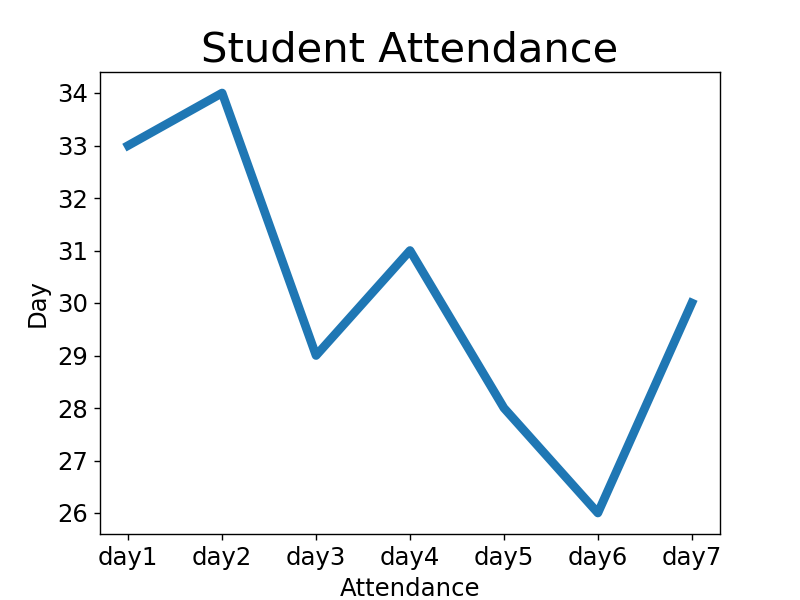

In [8]:
import matplotlib.pyplot as plt
student_attendance = {'day1':33, 'day2':34,'day3':29,'day4':31,'day5':28,'day6':26,'day7':30}

plt.figure()
attendance = list(student_attendance.values())
days = list(student_attendance.keys())

plt.plot(days, attendance, linewidth=5)

# Set chart title and label axes. 
plt.title("Student Attendance", fontsize=24)
plt.xlabel("Attendance", fontsize=14)
plt.ylabel("Day", fontsize=14)
# Set size of tick labels.

plt.tick_params(axis='both', labelsize=14)

## Working with larger data sets

#### using axis(x-min, x-max, y-min, y-max) 
Because this is a large data set, we use a smaller point size and we use the axis() function to specify the range of each axisw. The axis() function requires four values: the minimum and maximum values for the x-axis and the y-axis.

#### Removing borders from Data Points
matplotlib lets you color points individually in a scatter plot. The default— blue dots with a black border works well for plots with a few points. But when plotting many points, the black borders can blend together. To remove the borders around points, pass the argument edgecolor='none' when you call scatter()

#### Defining Custom Colors
To change the color of the points, pass c to scatter() with the name of a color to use, as shown here:

```python
plt.scatter(x_values, y_values, c='red', edgecolor='none', s=40)
```

You can also define custom colors using the RGB color model. To define a color, pass the c argument a tuple with three decimal values (one each for red, green, and blue), using values between 0 and 1. For example, the following line would create a plot with light blue dots:

```python
plt.scatter(x_values, y_values, c=(0, 0, 0.8), edgecolor='none', s=40)
```

Values closer to 0 produce darker colors, and values closer to 1 produce lighter colors.

We pass the list of y-values to c and then tell pyplot which colormap to use through the cmap argument. This code colors the points with lower y-values light blue and the points with larger y-values dark blue.

<IPython.core.display.Javascript object>


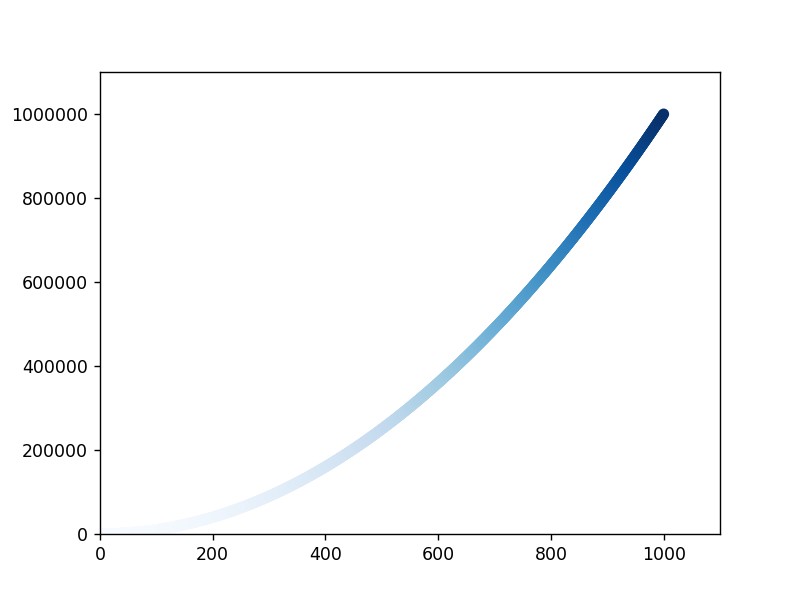

[0, 1100, 0, 1100000]

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt

x_values = range(1, 1001)
y_values = [x ** 2 for x in x_values]

plt.scatter(x_values, y_values, c=y_values, 
            cmap=plt.cm.Blues, edgecolor='none', s=40) # cm.Blues is a blue colormap and c=y_values makes the points gradually darker.
plt.axis([0, 1100, 0, 1100000])

# Saving Plots

If you want your program to save the plot to a file, call `plt.savefig()`:

```python
plt.savefig('filename.png', bbox_inches='tight')
```

The first argument is a filename for the plot image, which will be saved in the same directory. The second argument trims extra whitespace from the plot. If you want the extra whitespace around the plot, you can omit this argument.


<IPython.core.display.Javascript object>


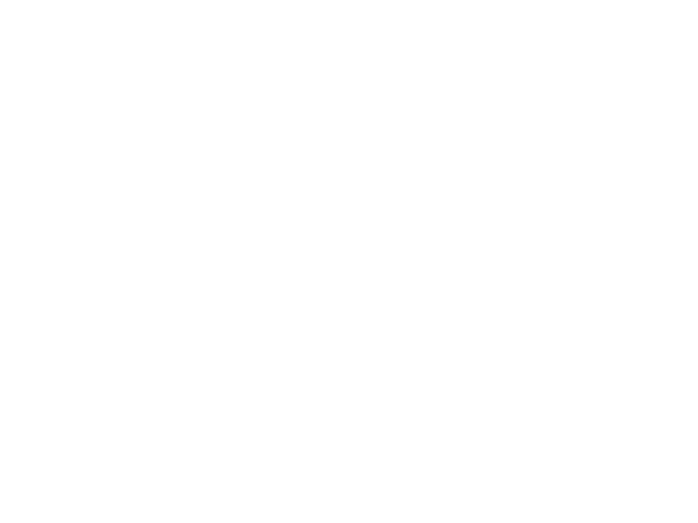

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

x_values = range(1, 1001)
y_values = [x ** 2 for x in x_values]

plt.scatter(x_values, y_values, c=y_values, cmap=plt.cm.Blues, edgecolor='none', s=40)
plt.axis([0, 1100, 0, 1100000])

plt.savefig('squares_plot.png', bbox_inches='tight')

In [16]:
%%bash
ls -ltr squares_plot.png

-rw-r--r-- 1 goo-x 197609 19876 feb 10 08:59 squares_plot.png


As you can see above, the file is generated and you can access it directly from the file server: http://localhost:8888/view/squares_plot.png
If you are asked for a password or token, get the token from terminal: `jupyter notebook list` this returns the token. Paste it into the browser and all is well.

# Bar Plots


We are going to have a look at the data about citicens in Copenhagen. Downloaded from (http://data.kk.dk/dataset/befolkningen-efter-ar-bydel-alder-og-statsborgerskab in august 2019)

In this section, we will mostly consider plotting histograms with bar plots. To do so, we have to first compute a bit of statistics. In the following we are computing how many people of a certain age lived in 2015 in Copenhagen.

 #### Getting the data ready

In [17]:
import kkdata

neighbourhoods_in_2015_data = kkdata.STATISTICS[2015].keys()
print('neighbourhoods: ',neighbourhoods_in_2015_data)
print('age range of neighbourhood 1', kkdata.STATISTICS[2015][1].keys(),'\n')
print('20 year olds in hood 1', kkdata.STATISTICS[2015][1][20], '\n')
print('20 year old danes in hood 1 (danes=5100)', kkdata.STATISTICS[2015][1][20][5100])
neighbourhoods = neighbourhoods_in_2015_data

def get_population_stat(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys()) #update() on set adds any new elements

    no_citicens_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    no_citicens_per_age.setdefault(age, 0) #sets default value if key not allready there
                    no_citicens_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][f_code]

    return no_citicens_per_age


stats = get_population_stat(2015)
ages = list(stats.keys())
no_citicens = list(stats.values())
print('------')
print('STATS:',stats)

neighbourhoods:  dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99])
age range of neighbourhood 1 dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 106]) 

20 year olds in hood 1 {5100: 678, 5104: 3, 5106: 1, 5110: 21, 5120: 5, 5128: 1, 5130: 6, 5140: 2, 5150: 2, 5154: 6, 5158: 2, 5164: 1, 5170: 6, 5174: 3, 5180: 4, 5182: 1, 5244: 1, 5302: 1, 5314: 3, 5390: 8, 5432: 1, 5442: 1, 5448: 1, 5482: 1, 5486: 1, 5502: 1, 5704: 1, 5776: 1, 5778: 1} 

20 year old danes in hood 1 (danes=5100) 678
------
STATS: {0: 8860, 1: 7914, 2: 7462, 3: 7053, 4: 6934, 5: 6299, 6: 6022, 7: 5666, 8: 5385, 9: 4894, 10: 4797, 11: 4669, 12: 4526, 13: 4523, 14:

#### Plotting

max: 16447


<IPython.core.display.Javascript object>


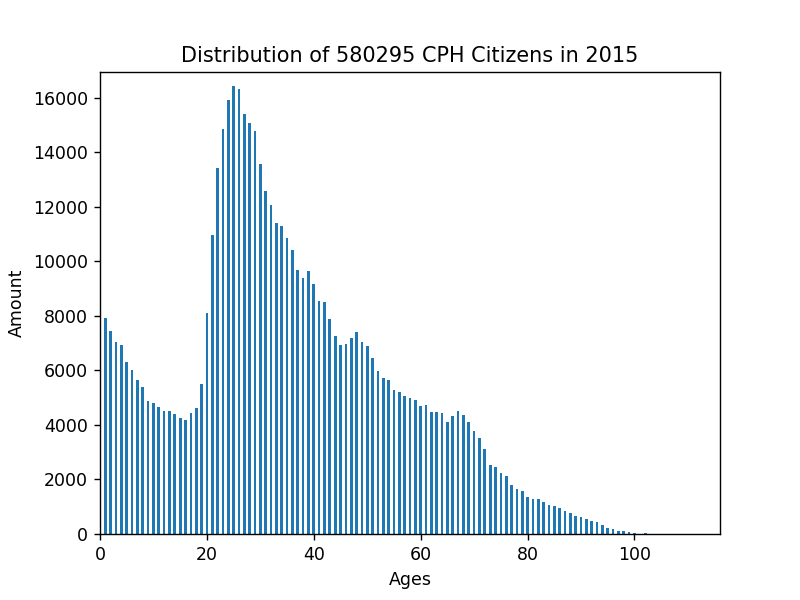

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt

max_y_key = max(stats, key=stats.get) #get max value of a dictionary
max_y_val = stats[max_y_key]
print('max:',max_y_val)
#plt.cla()
plt.bar(ages, no_citicens, width=0.5, align='center') # bar(x-vals, y-vals, bar width, align bar relative to x-val on x-axis) )
#plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, max_y_val+500]) #axis(x-min, x-max, y-min, y-max)
title = 'Distribution of {} CPH Citizens in {}'.format(sum(no_citicens), 2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

## Class exercise
1.1 Using this dict: `{'Holger':25,'Helga':54,'Hasse':76,'Halvor':12,'Hassan':43,'Hulda':31,'Hansi':102}` display a bar plot of the people and there ages sorted by age.  
1.2 Add title and x and y axis labels to the bar plot

2.1 Using the kkdata module with population data from Copenhagen display a line graph showing the population development over time (year on x and population on y)

<IPython.core.display.Javascript object>


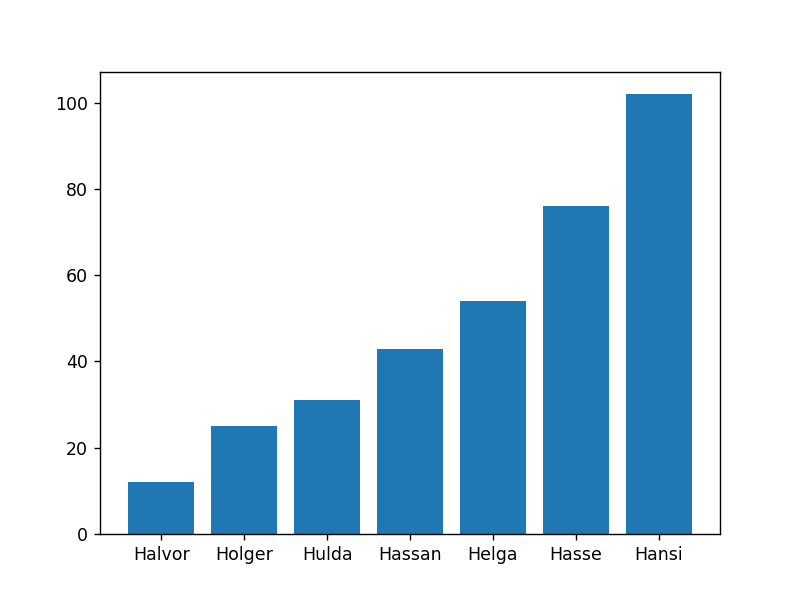

<BarContainer object of 7 artists>

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt

people = {'Holger':25,'Helga':54,'Hasse':76,'Halvor':12,'Hassan':43,'Hulda':31,'Hansi':102};
new_ppl = {k: v for k, v in sorted(people.items(), key=lambda item: item[1])}
people_names = list(new_ppl.keys())
people_ages = list(new_ppl.values())
plt.bar(people_names, people_ages)

## 2 data sets displayed together
Now we are going to extend our function that computes the statistics, so that it can distinguish between Copenhagen citicens who are Danish nationals and those who are expats.

In [38]:
import kkdata

def get_population_stat():
    
    age_range = set()
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[2015][n].keys())

    no_danes_per_age = {}
    no_foreign_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[2015][n].keys():
                c_codes = set(kkdata.STATISTICS[2015][n][age].keys())
                
                if 5100 in c_codes:
                    no_danes_per_age.setdefault(age, 0)
                    no_danes_per_age[age] += kkdata.STATISTICS[2015][n][age][5100]
                    
                    c_codes.remove(5100)

                for f_code in c_codes:
                    no_foreign_per_age.setdefault(age, 0)
                    no_foreign_per_age[age] += kkdata.STATISTICS[2015][n][age][f_code]
                    
    return no_danes_per_age, no_foreign_per_age # returning a comma separated set of elements creates a tuple

danes_per_age, foreigners_per_age = get_population_stat() #returned tuple is deconstructed into 2 variables

ages = list(danes_per_age.keys())
no_citicens = list(danes_per_age.values()) 
ages_f = list(foreigners_per_age.keys())
no_citicens_f = list(foreigners_per_age.values())

#### plt.bar() is run twice on he same figure

<IPython.core.display.Javascript object>


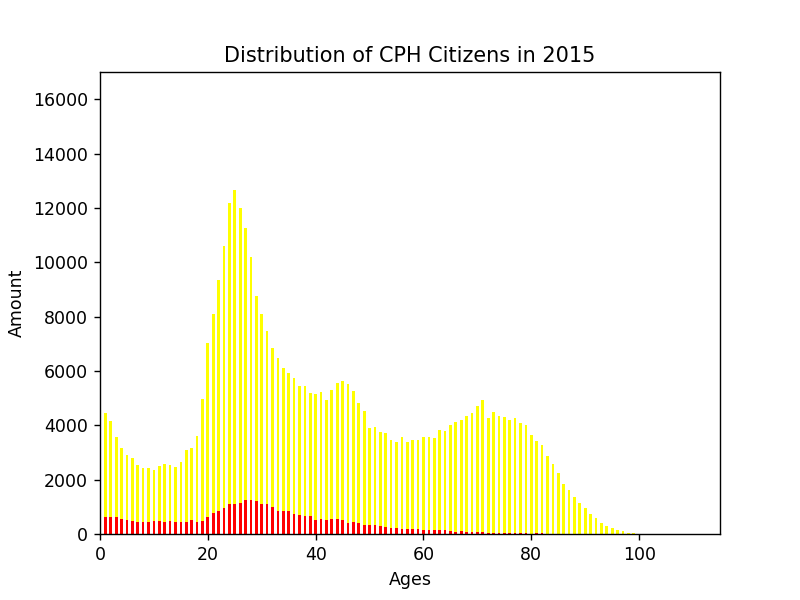

In [48]:
%matplotlib notebook
import matplotlib.pyplot as plt
 

plt.bar(ages, no_citicens, width=0.5, linewidth=0, align='center')
plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, 17000])
title = 'Distribution of CPH Citizens in {}'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

#fakes = list(range(10900, 300, -100))
#print(len(ages), '\n\n', no_citicens, '\n\n', len(fakes))
plt.bar(ages, no_citicens, width=0.5, linewidth=0, align='center', color='yellow')
plt.bar(ages_f, no_citicens_f, width=0.5, linewidth=0, align='center', color='red')

plt.show()

The above plot allows us to get a feeling for the distribution of the corresponding groups with respect to each other. But it hides the total amount of citicens. For that we should stack the according values on to of each other. 

To do that, we have to first **harmonize** the dimensions of our two populations.

In [41]:
# add keys to each others data sets
danes_per_age, foreigners_per_age = get_population_stat()
print(get_population_stat())
def add_keys_from_one_another(one, other): #harmonize: ensure both data collections have the same keys = x-axis
    for k, v in one.items():
        if not k in other.keys():
            other[k] = 0

add_keys_from_one_another(danes_per_age, foreigners_per_age)
add_keys_from_one_another(foreigners_per_age, danes_per_age)
        
ages = list(danes_per_age.keys())
no_citicens = list(danes_per_age.values())

ages_f = list(foreigners_per_age.keys())
no_citicens_f = list(foreigners_per_age.values())


({0: 7903, 1: 6985, 2: 6624, 3: 6266, 4: 6202, 5: 5667, 6: 5372, 7: 5090, 8: 4858, 9: 4442, 10: 4303, 11: 4207, 12: 4076, 13: 4036, 14: 3869, 15: 3812, 16: 3731, 17: 3939, 18: 4102, 19: 4806, 20: 7002, 21: 9538, 22: 11614, 23: 12578, 24: 13249, 25: 13500, 26: 13134, 27: 12342, 28: 11943, 29: 11616, 30: 10512, 31: 9556, 32: 9230, 33: 8687, 34: 8774, 35: 8588, 36: 8258, 37: 7563, 38: 7573, 39: 7909, 40: 7550, 41: 6981, 42: 6983, 43: 6548, 44: 5862, 45: 5620, 46: 5784, 47: 6089, 48: 6372, 49: 6004, 50: 5876, 51: 5543, 52: 5123, 53: 4963, 54: 4835, 55: 4599, 56: 4526, 57: 4453, 58: 4431, 59: 4368, 60: 4175, 61: 4244, 62: 4035, 63: 4081, 64: 4041, 65: 3773, 66: 3975, 67: 4193, 68: 4048, 69: 3846, 70: 3540, 71: 3288, 72: 2914, 73: 2373, 74: 2275, 75: 2076, 76: 1981, 77: 1688, 78: 1540, 79: 1486, 80: 1298, 81: 1210, 82: 1199, 83: 1120, 84: 1013, 85: 982, 86: 921, 87: 801, 88: 729, 89: 649, 90: 610, 91: 553, 92: 459, 93: 422, 94: 333, 95: 226, 96: 185, 97: 124, 98: 95, 99: 57, 100: 33, 102: 24

#### 2 datasets combined on top of each other

<IPython.core.display.Javascript object>


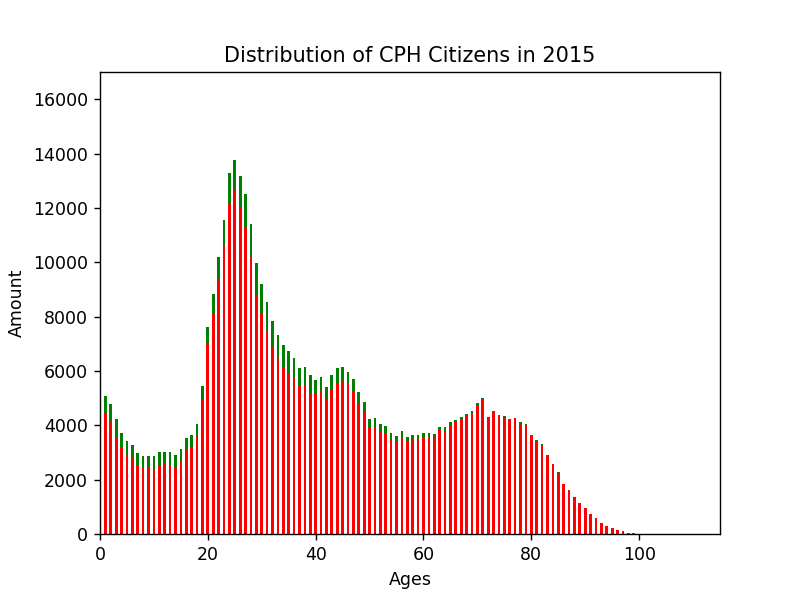

In [56]:
%matplotlib notebook

plt.bar(ages, no_citicens, width=0.5, linewidth=0, align='center', color='red')
plt.ticklabel_format(useOffset=False) ##
plt.axis([0, max(ages) + 10, 0, 17000])
title = 'Distribution of CPH Citizens in {}'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.bar(ages_f, no_citicens_f, width=0.5, linewidth=0, align='center', 
        color='green', bottom=no_citicens) #bottom= tels the bar to lay on top of the other dataset.
plt.show()

## Exercise
1. based on kkdata show the distribution of citizenships in all copenhagen areas and all ages in 2015  
**hint** if you need help to get the summarized population by citizenship from kkdata you can use:   
`import cit`  
`print(cit.get_citizen_dist(2015))`  
2. remove the danes (code 5100) and show only the top 10 nationalities.

#### danes and foreigners pr. age

In [44]:
import kkdata


def get_population_stat(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    print(neighbourhoods)
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_danes_per_age = {}
    no_foreign_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                
                if 5100 in c_codes:
                    no_danes_per_age.setdefault(age, 0)
                    no_danes_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][5100]
                    
                    c_codes.remove(5100)

                for f_code in c_codes:
                    no_foreign_per_age.setdefault(age, 0)
                    no_foreign_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][f_code]
                    
    return no_danes_per_age, no_foreign_per_age

In [45]:
year_of_interest = 1992
danes_per_age, foreigners_per_age = get_population_stat(year_of_interest)

add_keys_from_one_another(danes_per_age, foreigners_per_age)
add_keys_from_one_another(foreigners_per_age, danes_per_age)
        
ages = list(danes_per_age.keys())
no_citicens = list(danes_per_age.values())

ages_f = list(foreigners_per_age.keys())
no_citicens_f = list(foreigners_per_age.values())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99])


<IPython.core.display.Javascript object>


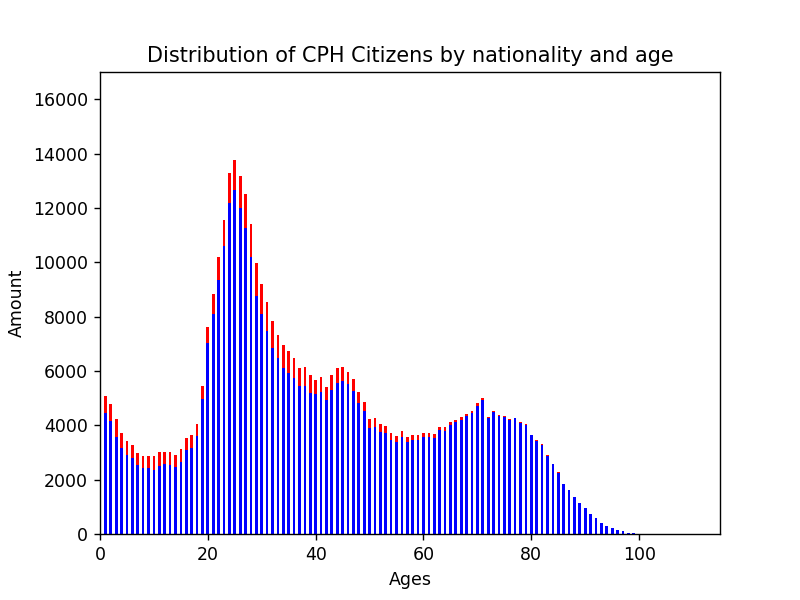

In [46]:
%matplotlib notebook


def setup_plot():
    plt.ticklabel_format(useOffset=False)
    plt.axis([0, max(ages) + 10, 0, 17000])
    title = 'Distribution of CPH Citizens by nationality and age'
    plt.title(title, fontsize=12)
    plt.xlabel("Ages", fontsize=10)
    plt.ylabel("Amount", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)


def plot_histogram(xs, ys, color='blue'):
    plt.bar(xs, ys, width=0.5, linewidth=0, align='center', color=color)

def plot_histogram_stack(xs, ys, ys_below, color='green'):
    plt.bar(xs, ys, width=0.5, linewidth=0, align='center', color=color,
            bottom=ys_below)


setup_plot()
plot_histogram(ages, no_citicens)
plot_histogram_stack(ages_f, no_citicens_f, no_citicens, 'red')
    
plt.show()

## Mind the Scale!

when visualizing your data keep in mind that you are responsible for how data is perceived. For example, people afraid of foreigners would understand from the following plot that there is an incredible increase in foreigners in the city. However, as you can see in the plot below, the increase of foreign citizens is not that big. Especially, it follows approxiately the development of the entire city population.

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99])
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99])


<IPython.core.display.Javascript object>


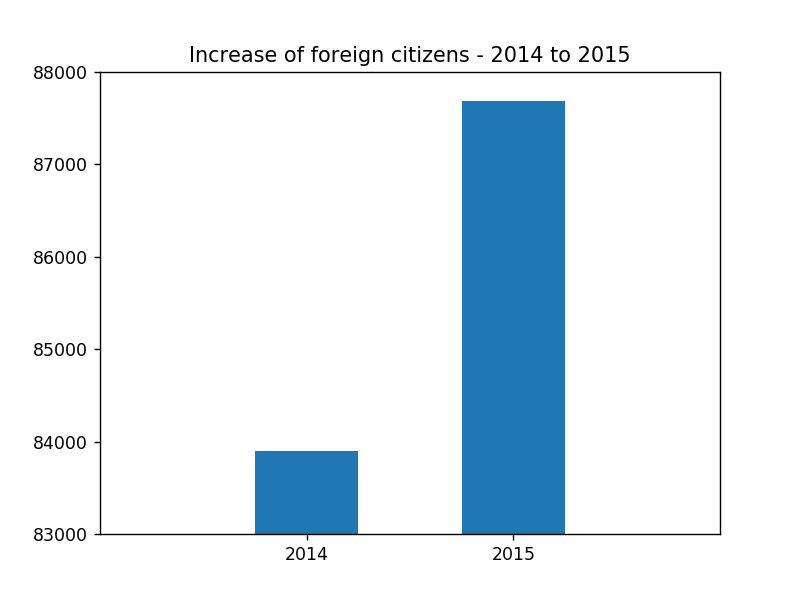

In [47]:
%matplotlib notebook


years_of_interest = [2014, 2015]
_, foreigners_a = get_population_stat(years_of_interest[0])
_, foreigners_b = get_population_stat(years_of_interest[1])

y_values = [sum(foreigners_a.values()), sum(foreigners_b.values())]

plt.bar(years_of_interest, y_values, width=0.5, linewidth=0, align='center')
title = 'Increase of foreign citizens - {} to {}'.format(
    years_of_interest[0], years_of_interest[1])
plt.title(title, fontsize=12)
plt.ticklabel_format(useOffset=False)
plt.xticks(years_of_interest)
plt.ticklabel_format(useOffset=False)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.axis([2013, 2016, 83000, 88000]) # HERE the scale of the axis

plt.show()

<IPython.core.display.Javascript object>


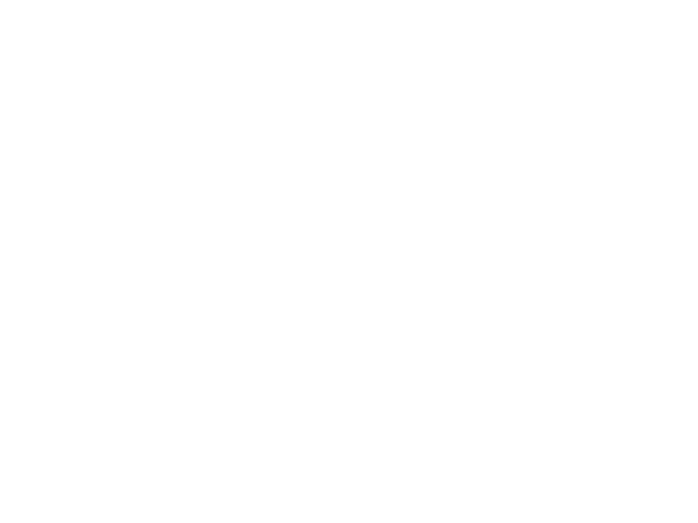

In [21]:
%matplotlib notebook

plt.bar(years_of_interest, y_values, width=0.5, linewidth=0, align='center')
title = 'Increase of foreign citizens - {} to {}'.format(
    years_of_interest[0], years_of_interest[1])
plt.title(title, fontsize=12)
plt.ticklabel_format(useOffset=False)
plt.xticks(years_of_interest)
plt.ticklabel_format(useOffset=False)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.axis([2013, 2016, 0, 88000]) # starting instead from 0 on y-axis

plt.show()

## 3D Plots (by stacking 2D plots behind each other)

Often, you need to access the third dimension to visualize your data properly. For example, in case you want to better understand the development of Copenhagen's population over time. In the following example, we plot 2D histograms 'behind' each other and make the plots a bit transparent. 

<IPython.core.display.Javascript object>


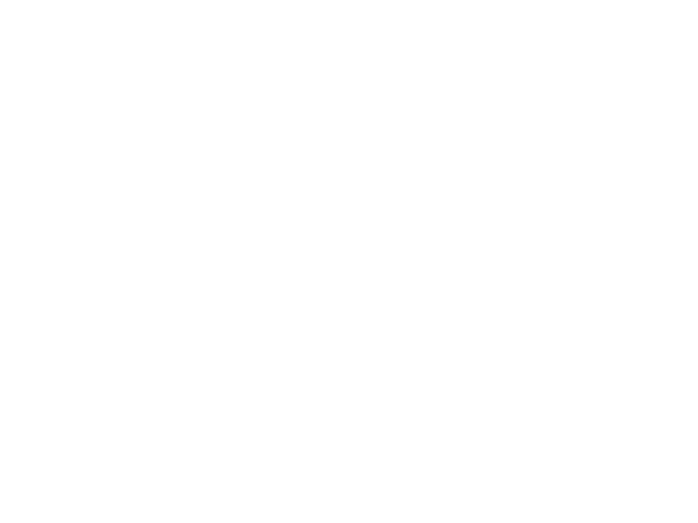

In [22]:
%matplotlib notebook

def get_population_stat_complete(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_citicens_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    no_citicens_per_age.setdefault(age, 0)
                    no_citicens_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][f_code]

    return (list(no_citicens_per_age.keys()), 
            list(no_citicens_per_age.values()))
    
def plot_histogram(ages, amounts, year, color='blue', alpha=1.0):
    x_values, y_values = ages, amounts
    plt.bar(x_values, y_values, width=0.5, linewidth=0, align='center', 
            color=color, alpha=alpha)
    plt.axis([0, 120, 0, 17000])
    title = 'Histogram for CPH Citizens'
    plt.title(title, fontsize=14)
    plt.xlabel("Ages", fontsize=10)
    plt.ylabel("Amount", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    
# using the alpha argument to gradually lower transparency.
year_of_interest = 1992
ages, amounts = get_population_stat_complete(year_of_interest)
plot_histogram(ages, amounts, year_of_interest, color='red', alpha=0.8)

year_of_interest = 1998
ages, amounts = get_population_stat_complete(year_of_interest)
plot_histogram(ages, amounts, year_of_interest, color='green', alpha=0.4)

year_of_interest = 2015
ages, amounts = get_population_stat_complete(year_of_interest)
plot_histogram(ages, amounts, year_of_interest, color='orange', alpha=0.3)


### 3D with transparent stack of sub plots

<IPython.core.display.Javascript object>


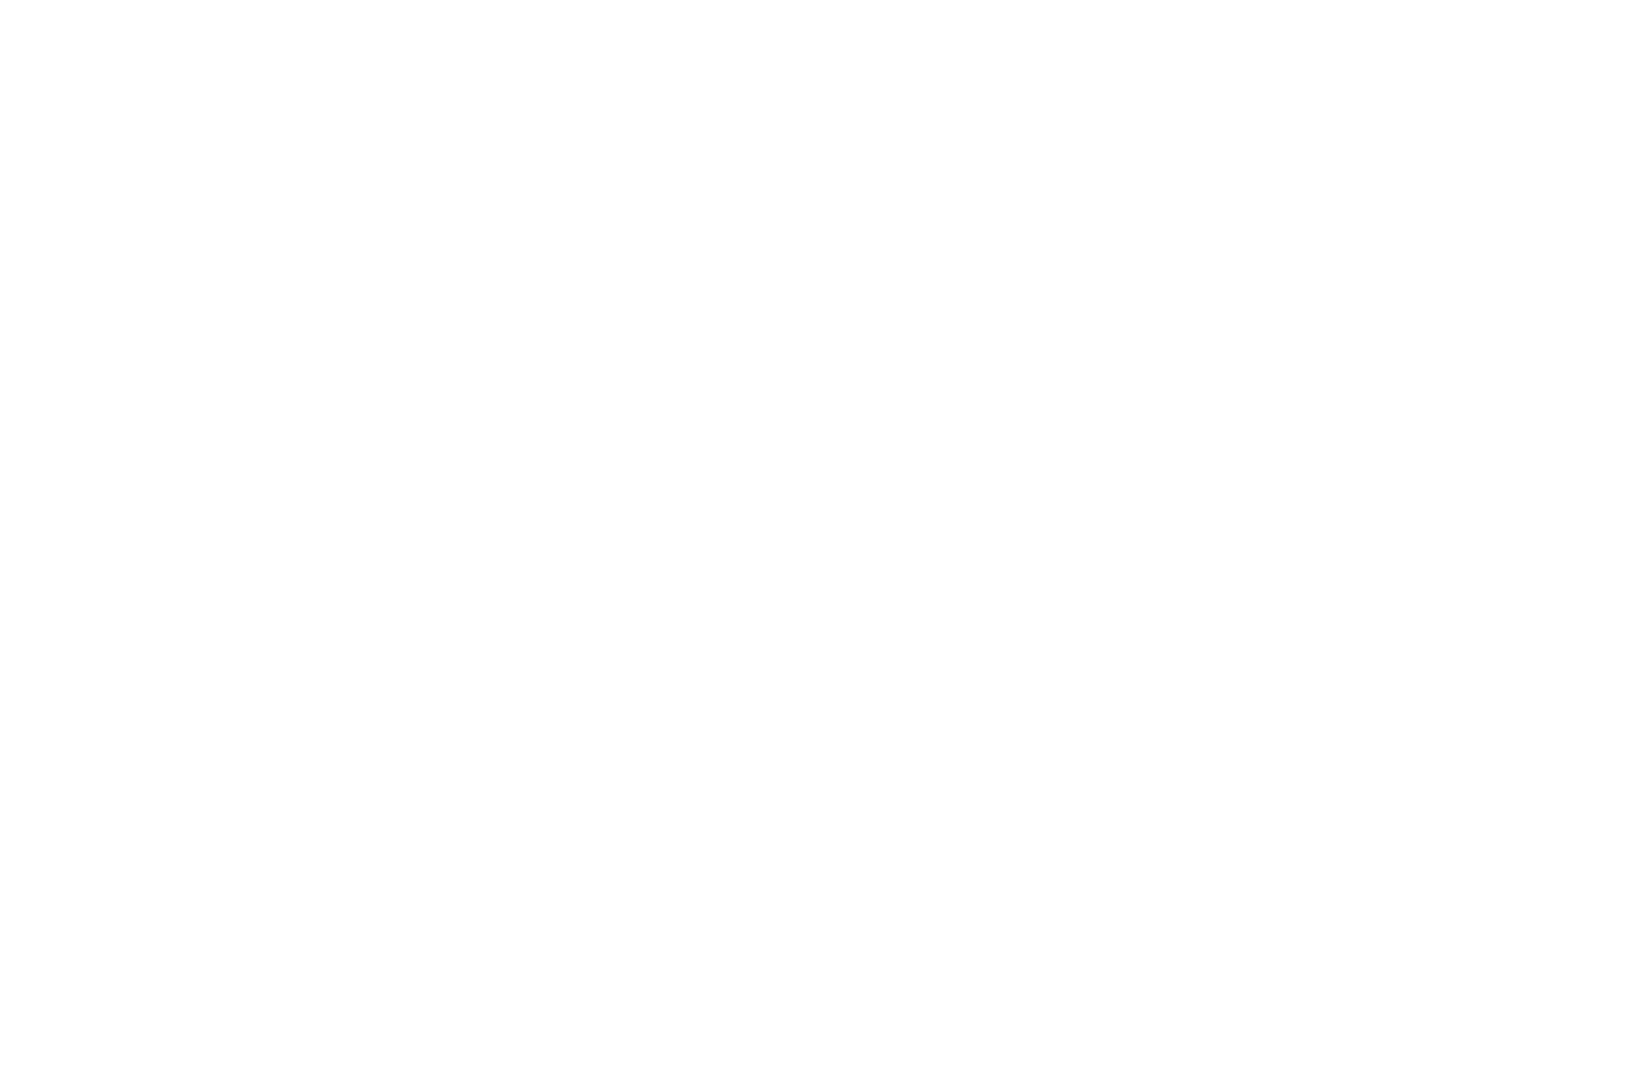

In [23]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d') # Add an Axes to the figure as part of a subplot arrangement.arg1=position (3 digits xyz, arg2=projection

years = list(range(2015, 1991, -1))
for year_of_interest in years:
    ages, amounts = get_population_stat_complete(year_of_interest)
    xs, ys = ages, amounts
    ax.bar(xs, ys, zs=year_of_interest, zdir='y', alpha=0.2, color='b') # render transparent bars next to each other
    
    #ax.scatter(xs, ys, zs=year_of_interest, zdir='y', alpha=0.2, cmap='hot', c=year_of_interest)
    #ax.plot_wireframe(xs, ys, year_of_interest, zdir='y', cstride=8, rstride=8, color = 'k')

ax.set_xlabel('X-ages')
ax.set_ylabel('Y-amount')
ax.set_zlabel('Z-years')

plt.savefig('3d_histo.png', bbox_inches='tight', dpi=300) # dpi=dots pr. inch bbox_inches= how much of the image to save.
plt.show()

## Using mpl_toolkits.mplot3d.Axes3D to create 3D 

<IPython.core.display.Javascript object>


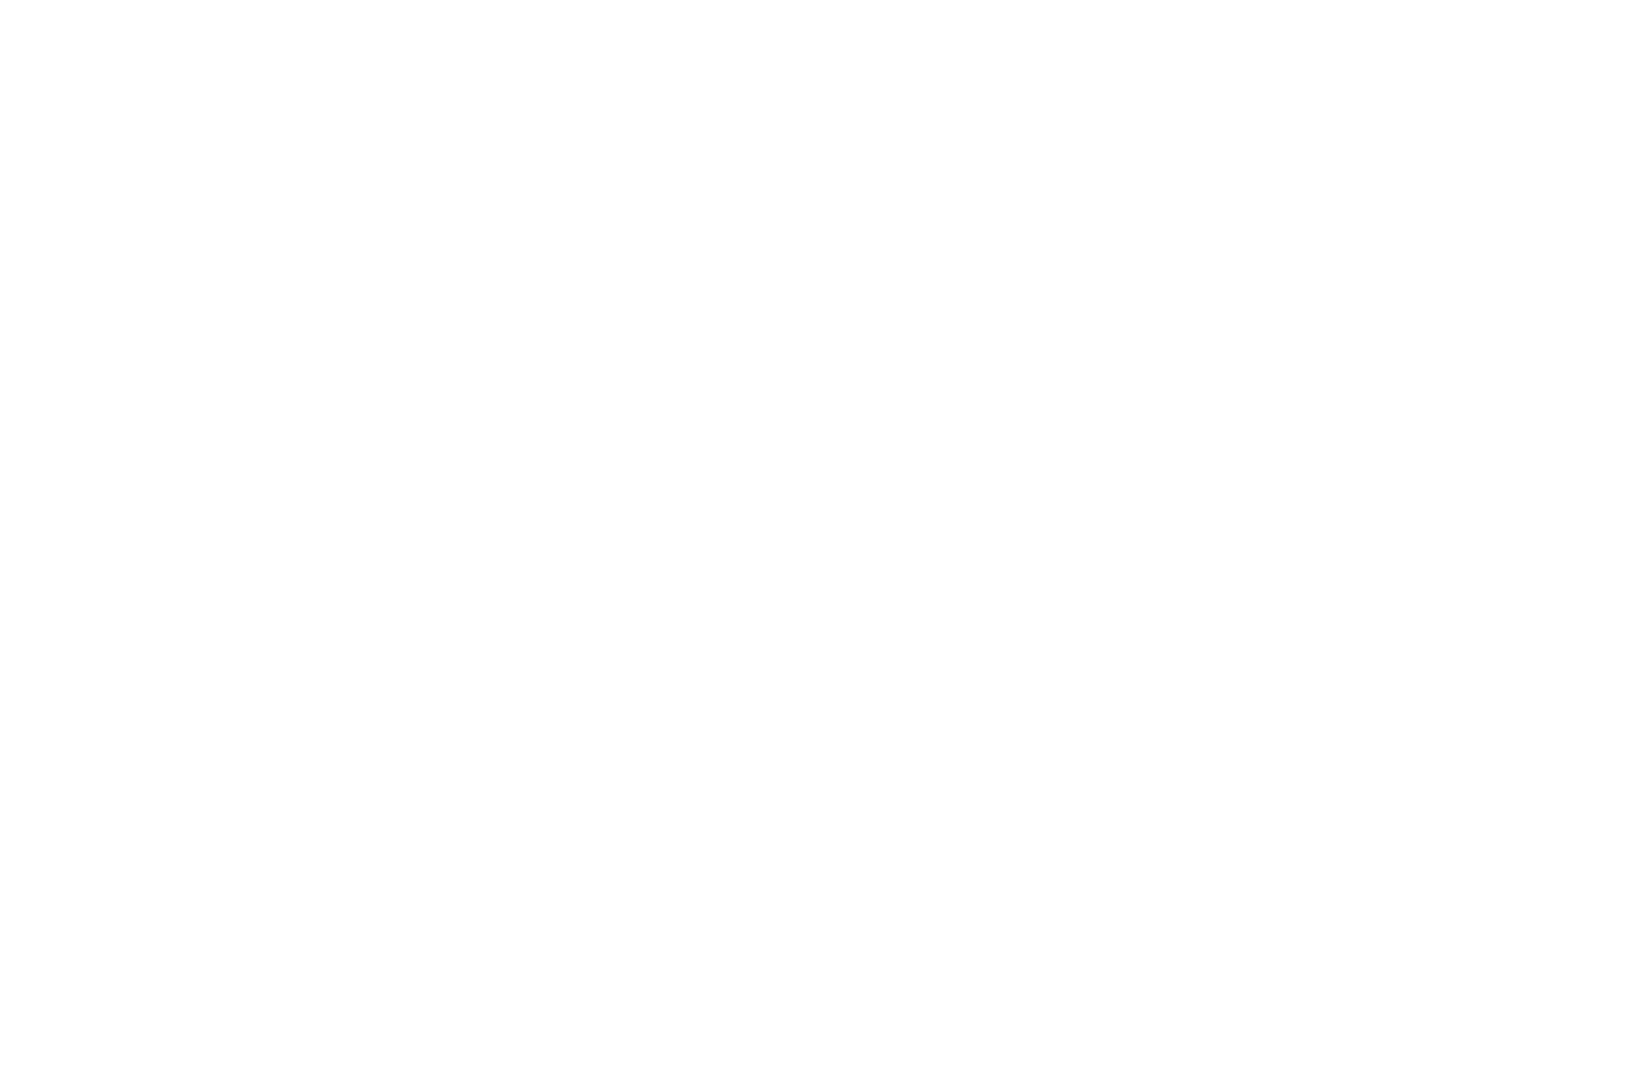

In [24]:
%matplotlib notebook
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


#ax.plot3D?
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d') # 111 (1 by 1 dimension for subplot 1)
years = list(range(2015, 1991, -1))

# create the data for the 3 axis:
xs, ys, zs = [], [], []
for year_of_interest in years:
    ages, amounts = get_population_stat_complete(year_of_interest)
    #print(len(ages), len(amounts))
    y = [year_of_interest] * len(ages[:105]) # creates list with 105 elements containing given year
    xs.append(ages[:105])                    # creates list with 105 elements. One for each age 0-104
    ys.append(y)                             
    zs.append(amounts[:105])                 # list with 105 elements each the amount from the year and age


ax.scatter3D(xs, ys, zs=zs, s=5)             # scatter all the single points


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d(0, 140)
ax.set_ylim3d(1990, 2016)
ax.set_zlim3d(0, 19000)
# ax.view_init(0, 0)
plt.savefig('3d_histo2.png', bbox_inches='tight', dpi=300)


http://127.0.0.1:8888/files/3d_histo2.png

## Pie charts

In [25]:
# function for formatting labels in pie chart used below
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

<IPython.core.display.Javascript object>


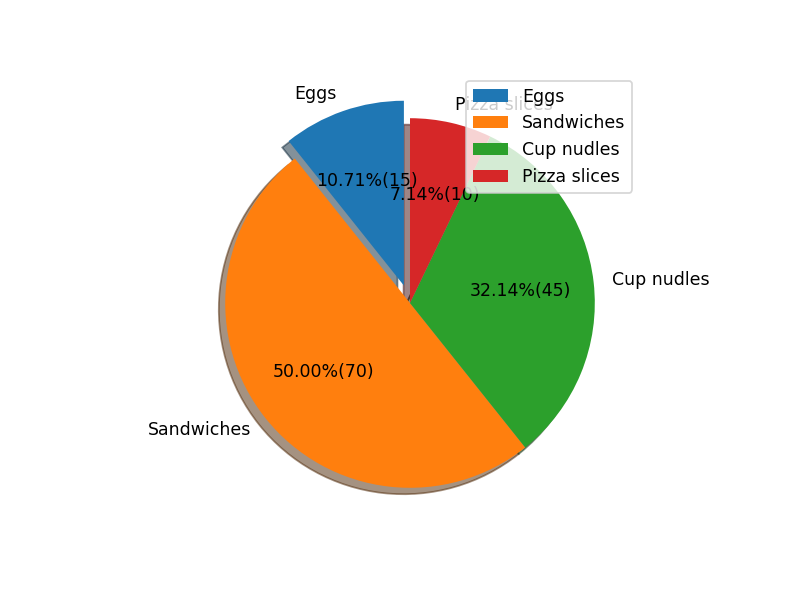

In [57]:
# import matplotlib.pyplot as plt

# Pie chart
data = {'Eggs': 15, 'Sandwiches': 70, 'Cup nudles': 45, 'Pizza slices': 10}
explode = (0.1, 0, 0, 0) # offset second slice
fig1, ax1 = plt.subplots() # first returned is the containing figure (fig1), then the subplot Axe object(s) (ax1)
ax1.pie(data.values(), labels=data.keys(), explode=explode, autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(data.values())), 
        #autopct=make_autopct(data.values()), 
        #autopct='%.1f', 
        # autopct= a format string like '%1.2f%%' for showing pct sign and 2 decimals
        shadow=True, startangle=90)
ax1.set_aspect('equal')
ax1.legend(data.keys(), loc='upper right') # use instead of labels in ax1.pie(...)
#ax1.axis('equal')  
#plt.tight_layout()
plt.show()

## Exercise with pie charts
1. Use this dictionary: `data = {'apple': 10,'banana':2,'citrus':32,'dragon fruit':8}`
2. Create a pie chart showing the distribution of the fruits

# Plotting to Maps with Folium

https://github.com/python-visualization/folium

`conda install folium -c conda-forge`

### Miljøzone 1
![](images/miljozone.png)

In [52]:
import json
import requests
import folium
import urllib


def get_city_location(city='Copenhagen'):
    """Get the location coordinates from OpenStreetMaps"""
    url_nomatim_api = 'https://nominatim.openstreetmap.org/search'
    r = requests.get(url_nomatim_api, params={'format': 'json', 'city': city})
    results = r.json()  # Potentially many matches
    print('results: ',results)
    location = results[0]
    lat, lon = float(location['lat']), float(location['lon'])
    return lat, lon


def get_geojson(url): 
    """
    return the response body as json
    GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes
    """
    response = requests.get(url)
    geo_json = response.json()
    return geo_json

In [53]:
cph_lat, cph_lon = get_city_location()
url_environ = 'http://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:miljozone&outputFormat=json&SRSNAME=EPSG:4326'
geo_json = get_geojson(url_environ) # contains attribute: geometri: type: multipolygon
print('\n\nGeoJSON open standard format:\n',geo_json)

results:  [{'place_id': 109373, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 13707878, 'boundingbox': ['55.5267243', '55.8467243', '12.4100724', '12.7300724'], 'lat': '55.6867243', 'lon': '12.5700724', 'display_name': 'København, Københavns Kommune, Region Hovedstaden, 1357, Danmark', 'class': 'place', 'type': 'city', 'importance': 0.7199038383120139, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}, {'place_id': 235483038, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 175928, 'boundingbox': ['43.881929', '43.905256', '-75.686985', '-75.6592015'], 'lat': '43.893439', 'lon': '-75.673828', 'display_name': 'Copenhagen, Lewis County, New York, United States of America', 'class': 'boundary', 'type': 'administrative', 'importance': 0.5150655424601236, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/po

In [54]:
map_osm = folium.Map(location=(cph_lat, cph_lon), zoom_start=10) # here we draw the map.
folium.GeoJson(geo_json, name='geojson').add_to(map_osm)         # here we plot the environmental zone 1
map_osm.save('./osm.html')
map_osm

http://127.0.0.1:8888/files/osm.html

## Get locations of 'Storbyhaverne'

In [55]:
cph_lat, cph_lon = get_city_location()
url = 'http://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:storbyhaver&outputFormat=json&SRSNAME=EPSG:4326'
geo_json = get_geojson(url)  # 'geometry': {'type': 'MultiPoint',
print('\n\ngetjson:\n',geo_json)

results:  [{'place_id': 109373, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 13707878, 'boundingbox': ['55.5267243', '55.8467243', '12.4100724', '12.7300724'], 'lat': '55.6867243', 'lon': '12.5700724', 'display_name': 'København, Københavns Kommune, Region Hovedstaden, 1357, Danmark', 'class': 'place', 'type': 'city', 'importance': 0.7199038383120139, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}, {'place_id': 235483038, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 175928, 'boundingbox': ['43.881929', '43.905256', '-75.686985', '-75.6592015'], 'lat': '43.893439', 'lon': '-75.673828', 'display_name': 'Copenhagen, Lewis County, New York, United States of America', 'class': 'boundary', 'type': 'administrative', 'importance': 0.5150655424601236, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/po

In [31]:

map_osm = folium.Map(location=(cph_lat, cph_lon), zoom_start=10) # show the map
folium.GeoJson(geo_json, name='geojson').add_to(map_osm) # add 
map_osm.save('./osm2.html')
map_osm

In [32]:
get_geojson(url)

{'type': 'FeatureCollection',
 'totalFeatures': 30,
 'features': [{'type': 'Feature',
   'id': 'storbyhaver.1',
   'geometry': {'type': 'MultiPoint',
    'coordinates': [[12.532585346355036, 55.71441272655595]]},
   'geometry_name': 'wkb_geometry',
   'properties': {'id': 28,
    'navn': 'Køkkenhaven i Bispeparken',
    'bydel': 8,
    'vejkode': '0544',
    'husnr': '22',
    'status': 'Eksisterende',
    'beskrivelse': 'Haverne dyrkes i fællesskab af beboerne i Bispeparken',
    'web_link_titel': None,
    'web_link': None,
    'kategori': 'Storbyhave'}},
  {'type': 'Feature',
   'id': 'storbyhaver.2',
   'geometry': {'type': 'MultiPoint',
    'coordinates': [[12.602742496969725, 55.66032201060657]]},
   'geometry_name': 'wkb_geometry',
   'properties': {'id': 29,
    'navn': 'Nabohaven',
    'bydel': 10,
    'vejkode': '4252',
    'husnr': '15',
    'status': 'Eksisterende',
    'beskrivelse': 'Nabohaven er et grønt mødested i Sundholmskvarteret. Alle er velkomne til at nyde haven.'

## Exercise with geo data
Show all the ghetto areas in Copenhagen using data from kk.dk:http://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:f_udsatte_byomraader&outputFormat=application%2Fjson&SRSNAME=EPSG:4326

The result should look something like below:

In [33]:
from IPython.display import IFrame
IFrame(src='./ghetto.html', width=700, height=600)

## Interactive plots with bokeh

In this session we will have a look in how to plot data with Bokeh (http://bokeh.pydata.org/en/latest/). You might want to use Bokeh for plotting your data when you want to generate interactive plots, which can be embedded in a homepage for example.

Bokeh generates plots for a JavaScript framework. However, you will define your plots and data in pure Python similar to `matplotlib`.

The following two lines are only necessary when you want to inline the generated plots into a Jupyter notebook.

In [34]:
from bokeh.io import output_notebook, show
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

Loading BokehJS ...

In this example we will plot the weather forecast for Copenhagen for the next days. We will receive the weather forecast from an API from http://openweathermap.org. They offer a free API for which you only have to register to receive an API key.

In case you want to run the following code navigate to https://home.openweathermap.org/users/sign_up to create a new account. After you registered and signed in, click on the second tab `API keys` (https://home.openweathermap.org/api_keys) and copy the default key to the clipboard and paste it into the line below replacing `YOUR_API_KEY`. This will generate a Python module `api_keys`, which we will extend in later sessions. The idea is that you have just one file collecting your API keys used in this course and its notebooks. Of course you can export yor key as an environment variable, which you can access via:

```python
import os

os.environ['OWM_API_KEY']
```

In [35]:
%%bash
echo "OWM_API_KEY='YOUR_API_KEY'" >> ./api_keys.py

The following code uses the `requests` module to query the REST API at OWM. For the moment we will not discuss this further. In the later session on using remote APIs and webscraping we will come back to this module.

In [36]:
import json
import api_keys
import requests
import pandas as pd
from pandas.io.json import json_normalize


url = "http://api.openweathermap.org/data/2.5/forecast"
req = requests.get(url, params={'q': 'Copenhagen,dk', 'mode': 'json', 
                                'units': 'metric', 
                                'appid': api_keys.OWM_API_KEY})

req_json = json.loads(req.text)
forecasts = req_json['list']
forecasts_tbl = json_normalize(forecasts)
forecasts_tbl

KeyError: 'list'

In a first step, we will just plot the temperature forecast as a line plot. The temperature data is in the column `forecasts_tbl['main.temp']`. The plot itself is created with the help of the `p.line` method. Similar to the `matplotlib` plotting methods, the first argument is a list holding the values for the x-axis and the second argument holds the values for the y-axis.

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models.ranges import Range1d
from bokeh.models import LinearAxis
from datetime import datetime


# Convert string to dates
date_fmt = '%Y-%m-%d %H:%M:%S'
dates = [datetime.strptime(date_str, date_fmt) for date_str in forecasts_tbl['dt_txt']]

# Generate a figure
p = figure(x_axis_type='datetime', plot_width=600, plot_height=400)

p.title.text = 'Weather Forecast'
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Temperature'

# Add a line renderer for the temperature
temp_in_cel = forecasts_tbl['main.temp']
p.line(dates, temp_in_cel, line_width=4, legend='Temp. ∘C')

# Setting the y axis range   
p.y_range = Range1d(temp_in_cel.min() - 10, temp_in_cel.max() + 10)

show(p)

http://127.0.0.1:8888/files/weather_forecast.html

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models.ranges import Range1d
from bokeh.models import LinearAxis
from datetime import datetime


temp_in_cel = forecasts_tbl['main.temp']
# rain = forecasts_tbl['rain.3h']
snow = forecasts_tbl['snow.3h']

# Convert string to dates
dates = []
for date_str in forecasts_tbl['dt_txt']:
    date_as_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    dates.append(date_as_date)

# Generate a figure
p = figure(x_axis_type='datetime', plot_width=600, plot_height=400, 
           toolbar_sticky=False)

p.title.text = 'Weather Forecast'
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Temperature'

# Add a line renderer for the temperature

# Setting the y axis range   
p.y_range = Range1d(temp_in_cel.min() - 10, temp_in_cel.max() + 10)

# Adding the second axis to the plot.  
p.extra_y_ranges = {'Precipation': Range1d(start=0, end=snow.max() + 2)}
p.add_layout(LinearAxis(y_range_name='Precipation', axis_label="Precipation"), 'right')

# Setting bar values for rain and snow
#p.rect(dates, y=rain / 2, width=10, height=rain, width_units='screen', 
#       y_range_name='Precipation', legend='Rain mm', 
#       color='#CAB2D6', alpha=0.5)

p.rect(dates, y=snow / 2, width=10, height=snow, width_units='screen', 
       y_range_name='Precipation', legend='Snow mm', 
       color='#CAB000', alpha=0.5)

p.line(dates, temp_in_cel, line_width=4, legend='Temp. ∘C')
p.legend.orientation = "vertical"
output_file("./weather_forecast.html")
show(p)

Now we have an interactive plot in which we can zoom and inspect the data. Compare that to for example the forecasts produced by DMI (http://www.dmi.dk/vejr/til-lands/byvejr/by/vis/DK/1000/København/). Those are, static images, similar to what we produced in the last lecture with `matplotlib`.

More examples for using Bokeh for plotting can be found in their Github repository https://github.com/bokeh/bokeh-notebooks/tree/master/tutorial.